<a href="https://colab.research.google.com/github/Nekokan1500/Machine-Learning/blob/main/DataPrep/Example_Image_Processing_K_Nearest_Neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

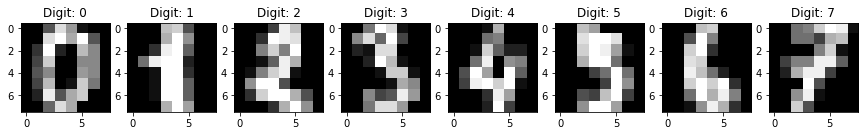

In [19]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np

digits = load_digits()

def display_img(img, target, ax):
  img = img.reshape((8,8))
  ax.imshow(img, cmap='gray')
  ax.set_title(f'Digit: {str(target)}')
  ax.grid(False)

fig, axs = plt.subplots(1,8,figsize=(15,10))
for i in range(8):
  display_img(digits['data'][i], digits['target'][i], axs[i])

Accuracy score: 0.98


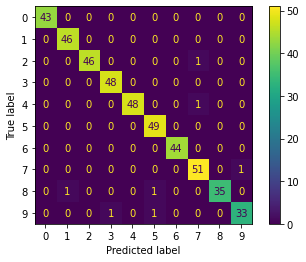

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

x, y = digits['data'], digits['target']
x_train, x_test, y_train, y_test = train_test_split(x,y)

clf = KNeighborsClassifier(n_neighbors=11, metric='manhattan')
clf.fit(x_train, y_train)
y_test_pred = clf.predict(x_test)
print("Accuracy score: %.2f" % accuracy_score(y_test, y_test_pred))
cm = confusion_matrix(y_test, y_test_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

In [3]:
import pandas as pd
from sklearn.metrics import DistanceMetric

points = pd.DataFrame([[1,2],[4,6]], columns=['x1','x2'])
p_list = [1,2,10,50,100]
d = [(p, DistanceMetric.get_metric('minkowski', p=p).pairwise(points)[0][-1]) for p in p_list]
ds = [x[1] for x in d]

In [4]:
from sklearn.metrics.pairwise import (
    euclidean_distances,
    manhattan_distances,
    cosine_distances
)

# Manhattan and Euclidean distance is not scale-invariant
d0 = manhattan_distances([1.0*digits['data'][0], 2.0*digits['data'][0]])[0,1]
print("Manhattan distance: %.2f" % d0)
d1 = euclidean_distances([1.0*digits['data'][0], 2.0*digits['data'][0]])[0,1]
print("Euclidean distance: %.2f" % d1)
# Cosine distance is scale-invariant
d2 = cosine_distances([1.0*digits['data'][0], 2.0*digits['data'][0]])[0,1]
print("Cosine distance: %.2f" % d2)

Manhattan distance: 294.00
Euclidean distance: 55.41
Cosine distance: 0.00


In [8]:
# Explore optimal parameters with cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

parameters = {
    'metric': ('manhattan','euclidean','cosine'),
    'n_neighbors': range(1, 21)
}

knn = KNeighborsClassifier()
gscv = GridSearchCV(knn, param_grid=parameters, scoring='accuracy')

gscv.fit(x_train, y_train)

y_test_pred = gscv.predict(x_test)
print(accuracy_score(y_test, y_test_pred))
print(gscv.best_params_)

0.9955555555555555
{'metric': 'cosine', 'n_neighbors': 1}


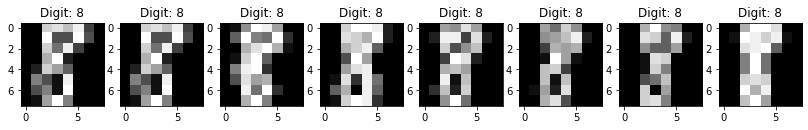

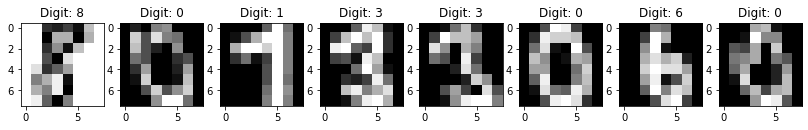

In [18]:
# Using custom distances
clf = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
clf.fit(x_train, y_train)
y_train_pred = clf.predict(x_train)

fig, axs = plt.subplots(1,8,figsize=(14,5))
display_img(x_train[0], y_train[0], axs[0])

_, kneighbors_index = clf.kneighbors(
    [x_train[0]], n_neighbors=7, return_distance=True
)

for i, neighbor_index in enumerate(kneighbors_index[0], 1):
  display_img(x_train[neighbor_index],y_train[neighbor_index],axs[i])

x_train_inv = x_train.max() - x_train

img_inv = x_train_inv[0]
fig, axs = plt.subplots(1,8,figsize=(14,5))
display_img(img_inv, y_train[0], axs[0])

_, kneighbors_index_inv = clf.kneighbors(
    [x_train_inv[0]], n_neighbors=7, return_distance=True
)

for i, neighbor_index in enumerate(kneighbors_index_inv[0], 1):
  display_img(x_train[neighbor_index],y_train[neighbor_index],axs[i])

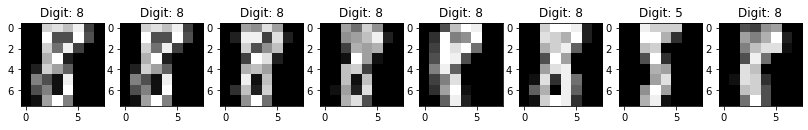

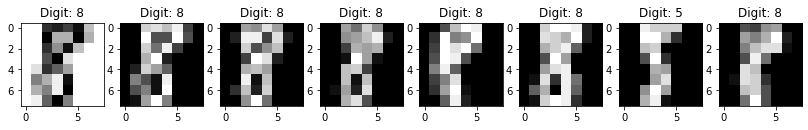

In [20]:
# Define a custom distance that is invariant of pixel inversion
from sklearn.metrics.pairwise import euclidean_distances

def contrast_distance(x1, x2):
  _x1, _x2 = np.abs(8 - x1), np.abs(8 - x2)
  d = euclidean_distances([_x1], [_x2])
  return d[0][0]

clf = KNeighborsClassifier(n_neighbors=3, metric=contrast_distance)
clf.fit(x_train, x_train)

fig, axs = plt.subplots(1,8,figsize=(14,5))
display_img(x_train[0], y_train[0], axs[0])

_, kneighbors_index = clf.kneighbors(
    [x_train[0]], n_neighbors=7, return_distance=True
)

for i, neighbor_index in enumerate(kneighbors_index[0], 1):
  display_img(x_train[neighbor_index],y_train[neighbor_index],axs[i])

fig, axs = plt.subplots(1,8,figsize=(14,5))
display_img(img_inv, y_train[0], axs[0])

_, kneighbors_index_inv = clf.kneighbors(
    [x_train_inv[0]], n_neighbors=7, return_distance=True
)

for i, neighbor_index in enumerate(kneighbors_index_inv[0], 1):
  display_img(x_train[neighbor_index],y_train[neighbor_index],axs[i])

In [22]:
from sklearn.neighbors import KNeighborsRegressor

clf = KNeighborsRegressor(n_neighbors=3, metric='euclidean')
clf.fit(x_train, y_train)
y_test_pred = clf.predict(x_test)

pd.DataFrame({
    'y_test': y_test,
    'y_test_pred': y_test_pred
})

,y_test,y_test_pred
0,7,7.0
1,0,0.0
2,5,5.0
3,9,9.0
4,6,6.0
...,...,...
445,2,2.0
446,1,1.0
447,8,8.0
448,9,9.0


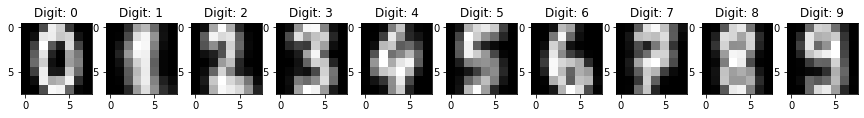

In [23]:
# Testing of nearest centroid classifier
from sklearn.neighbors import NearestCentroid

clf = NearestCentroid(metric='euclidean')
clf.fit(x_train, y_train)

fig, axs = plt.subplots(1, len(clf.classes_), figsize=(15,5))

for i, (centroid, label) in enumerate(zip(clf.centroids_, clf.classes_)):
  display_img(centroid, label, axs[i])

fig.show()